#  Sales Pipeleine Dataset Analyzing and Visualizing

The aim of this project is to analyze and visualize the sales pipeline dataset to identify which sales agents are selling which products, to which accounts, and to determine their respective deal stages and close values

In [1]:
#Importing the necassery libraries needed to analyze the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Now, Let's import the dataset file which we need to work on.
dataset=pd.read_csv('sales_pipeline.csv')

In [3]:
#Checking whether the dataset has been properly imported or not.
dataset

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
...,...,...,...,...,...,...,...,...
8795,9MIWFW5J,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8796,6SLKZ8FI,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8797,LIB4KUZJ,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8798,18IUIUK0,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN


#                                 Cleaning the dataset

In [4]:
#Getting the information of the dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


In [5]:
#Checking if there is any missing value's
dataset.isnull().sum()

opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

In [6]:
#Filling the missing values in the account column
dataset['account'].fillna('Hottechi',inplace=True)

In [7]:
#Filling the missing values in the engage date column
dataset['engage_date'].fillna(method='ffill',inplace=True)
dataset['engage_date'].fillna(method='bfill',inplace=True)

In [8]:
#Filling the missing value in the close date column
dataset['close_date'].fillna(method='ffill',inplace=True)
dataset['close_date'].fillna(method='bfill',inplace=True)

In [9]:
#Filling the missing value in the close value column
dataset['close_value'].fillna(dataset['close_value'].mean(),inplace=True)

In [10]:
# Convert dates to datetime format
dataset['engage_date'] = pd.to_datetime(dataset['engage_date'], errors='coerce')
dataset['close_date'] = pd.to_datetime(dataset['close_date'], errors='coerce')

In [11]:
dataset['engage_year'] = dataset['engage_date'].dt.year
dataset['engage_month'] = dataset['engage_date'].dt.month
dataset['close_year'] = dataset['close_date'].dt.year
dataset['close_month'] = dataset['close_date'].dt.month

In [12]:
#Checking whether the data's are properly filled in the dataset
dataset

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,engage_year,engage_month,close_year,close_month
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.000000,2016,10,2017,3
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.000000,2016,10,2017,3
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.000000,2016,10,2017,3
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.000000,2016,10,2017,3
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.000000,2016,10,2017,3
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,9MIWFW5J,Versie Hillebrand,MG Advanced,Hottechi,Prospecting,2017-12-27,2017-12-29,1490.915512,2017,12,2017,12
8796,6SLKZ8FI,Versie Hillebrand,MG Advanced,Hottechi,Prospecting,2017-12-27,2017-12-29,1490.915512,2017,12,2017,12
8797,LIB4KUZJ,Versie Hillebrand,MG Advanced,Hottechi,Prospecting,2017-12-27,2017-12-29,1490.915512,2017,12,2017,12
8798,18IUIUK0,Versie Hillebrand,MG Advanced,Hottechi,Prospecting,2017-12-27,2017-12-29,1490.915512,2017,12,2017,12


In [13]:
#Checking if there is any missing value's in the dataset after all the values are filled
dataset.isnull().sum()

opportunity_id    0
sales_agent       0
product           0
account           0
deal_stage        0
engage_date       0
close_date        0
close_value       0
engage_year       0
engage_month      0
close_year        0
close_month       0
dtype: int64

In [14]:
#Converting the float value in the close value column to integers
dataset['close_value']=dataset['close_value'].astype(int)

In [15]:
#Checking whether the close value is changed to int value or not using dtype function
dataset.dtypes

opportunity_id            object
sales_agent               object
product                   object
account                   object
deal_stage                object
engage_date       datetime64[ns]
close_date        datetime64[ns]
close_value                int32
engage_year                int64
engage_month               int64
close_year                 int64
close_month                int64
dtype: object

Text(0.5, 0.98, 'Visualizing the Describe Function')

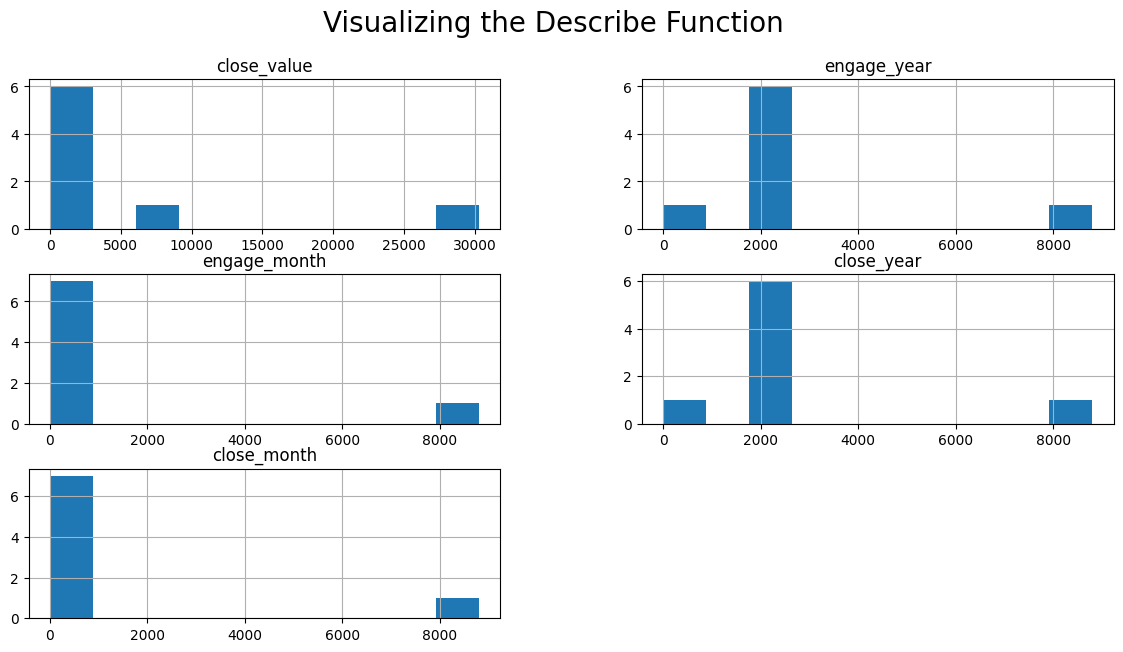

In [16]:
dataset.describe().hist(figsize=(14,7))
plt.suptitle('Visualizing the Describe Function',fontsize=20)

# Data cleaning, wrangling and visualizing

In [17]:
dataset['sales_agent'].value_counts()

Darcel Schlecht       747
Vicki Laflamme        451
Anna Snelling         448
Kary Hendrixson       438
Kami Bicknell         362
Versie Hillebrand     361
Zane Levy             349
Cassey Cress          346
Jonathan Berthelot    345
Gladys Colclough      317
Lajuana Vencill       311
Corliss Cosme         310
Markita Hansen        306
Maureen Marcano       285
Marty Freudenburg     281
Donn Cantrell         275
James Ascencio        267
Violet Mclelland      261
Moses Frase           260
Daniell Hammack       259
Niesha Huffines       239
Reed Clapper          237
Boris Faz             210
Cecily Lampkin        203
Hayden Neloms         202
Elease Gluck          177
Rosie Papadopoulos    160
Rosalina Dieter       160
Garret Kinder         123
Wilburn Farren        110
Name: sales_agent, dtype: int64

Text(0.5, 1.0, 'Sales_Agent_Data_Visualize')

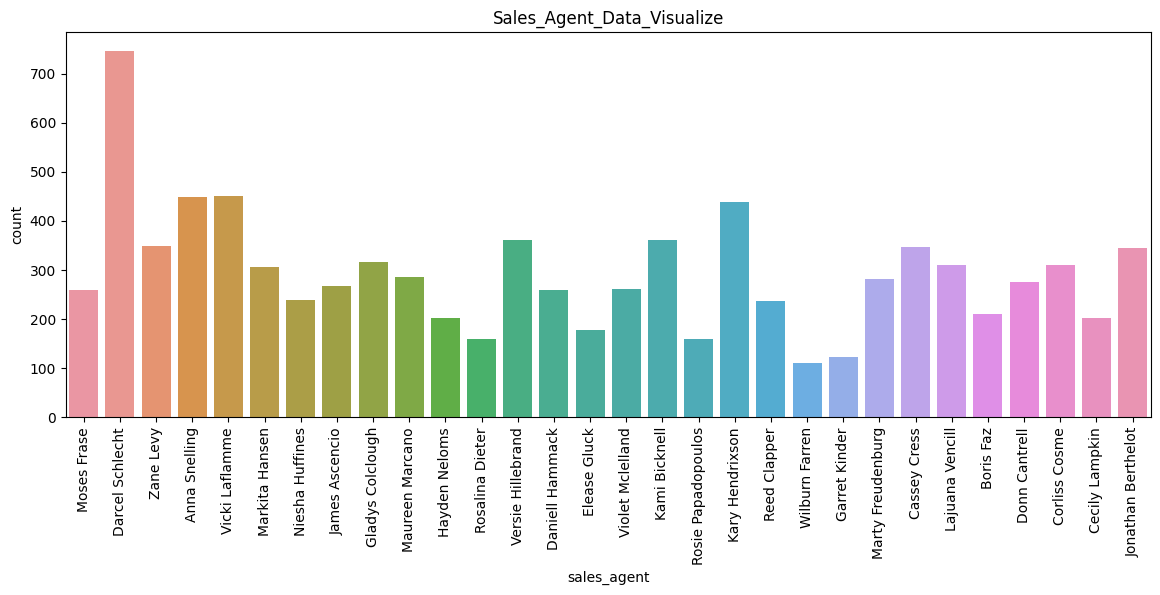

In [18]:
plt.figure(figsize=(14,5))
sns.countplot(data=dataset,x='sales_agent')
plt.xticks(rotation=90)
plt.title('Sales_Agent_Data_Visualize')

In [19]:
dataset['product'].value_counts()

GTX Basic         1866
MG Special        1651
GTXPro            1480
MG Advanced       1412
GTX Plus Basic    1383
GTX Plus Pro       968
GTK 500             40
Name: product, dtype: int64

Text(0.5, 1.0, 'Visualizing the product data')

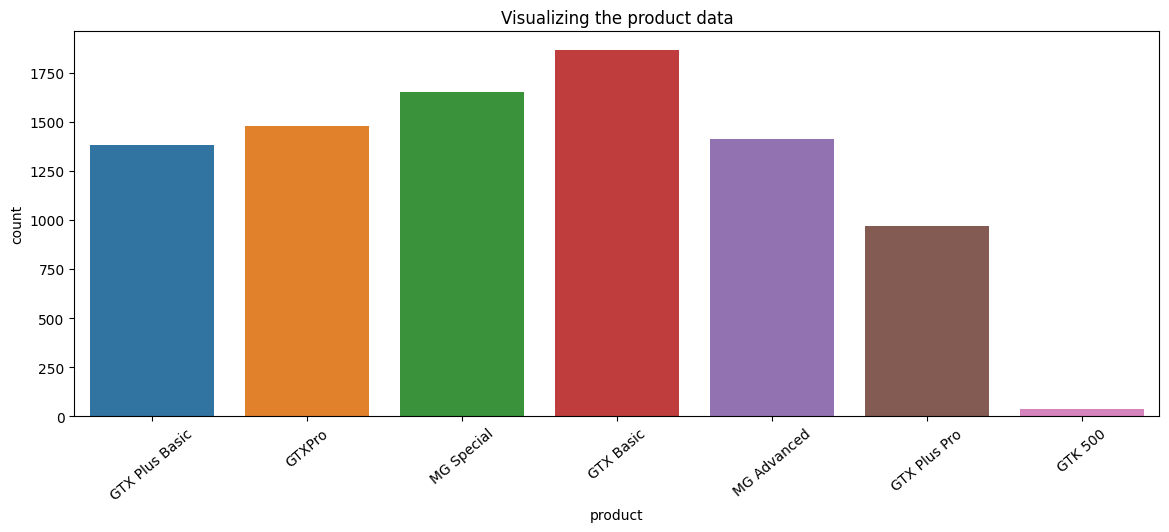

In [20]:
plt.figure(figsize=(14,5))
sns.countplot(data=dataset,x='product')
plt.xticks(rotation=40)
plt.title('Visualizing the product data')

In [21]:
dataset['account'].value_counts()

Hottechi                 1625
Kan-code                  196
Konex                     178
Condax                    170
Dontechi                  129
                         ... 
Newex                      55
Bioplex                    53
The New York Inquirer      52
Sumace                     52
Iselectrics                51
Name: account, Length: 85, dtype: int64

Text(0.5, 0.98, 'Account data')

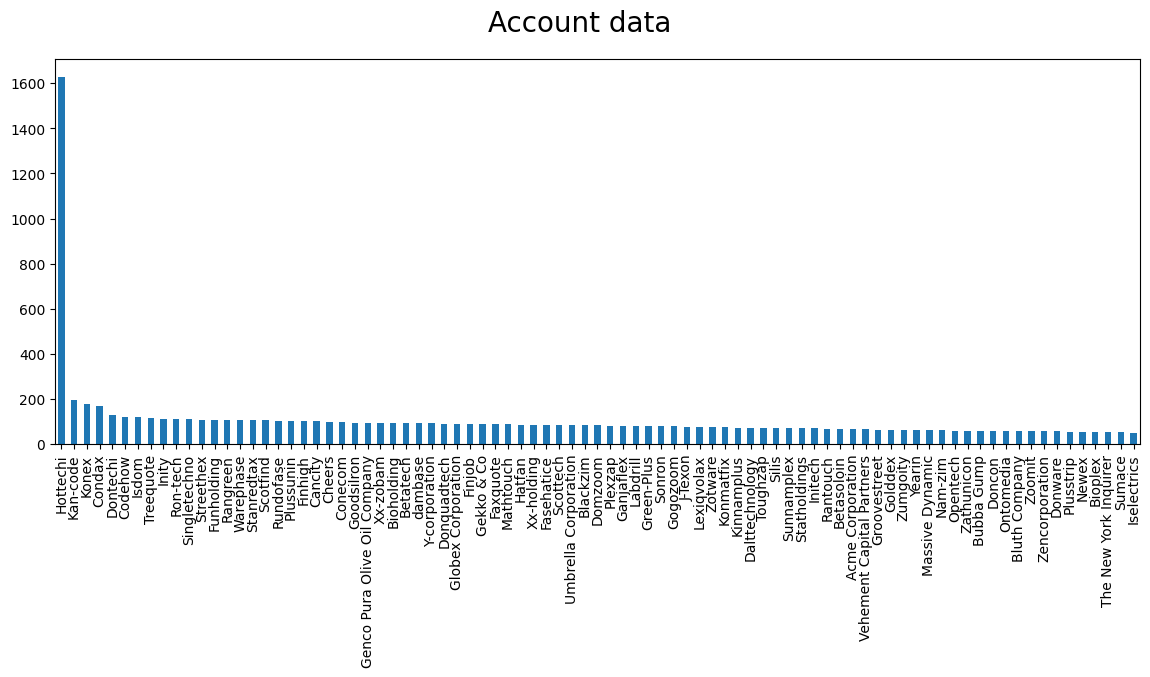

In [22]:
plt.figure(figsize=(14,5))
dataset['account'].value_counts().plot(kind='bar')
plt.suptitle('Account data',fontsize=20)

In [23]:
dataset['deal_stage'].value_counts()

Won            4238
Lost           2473
Engaging       1589
Prospecting     500
Name: deal_stage, dtype: int64

Text(0.5, 1.0, 'Deal_Stage_Data')

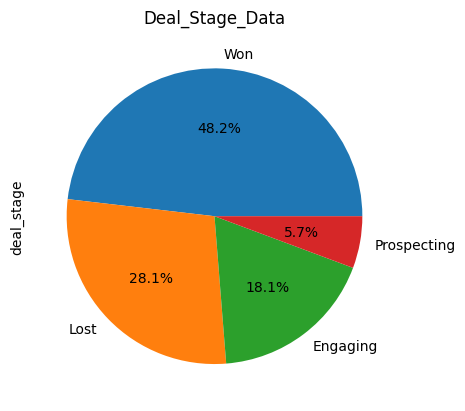

In [24]:
dataset['deal_stage'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Deal_Stage_Data')

In [25]:
dataset['close_value'].value_counts()

0       2473
1490    2089
54        80
53        57
57        55
        ... 
5695       1
1216       1
4712       1
3908       1
1052       1
Name: close_value, Length: 2052, dtype: int64

From the above analysis and visualization of each column in the dataset, we can clearly see that Darcel Schlecht is the top-performing sales agent, GTX Basic is the best-selling product, Hottechi is the most valuable account, and the majority of deals were won, with a winning rate of 48.2%.

# EDA

Text(0.5, 0.98, 'Distribution of Close Values')

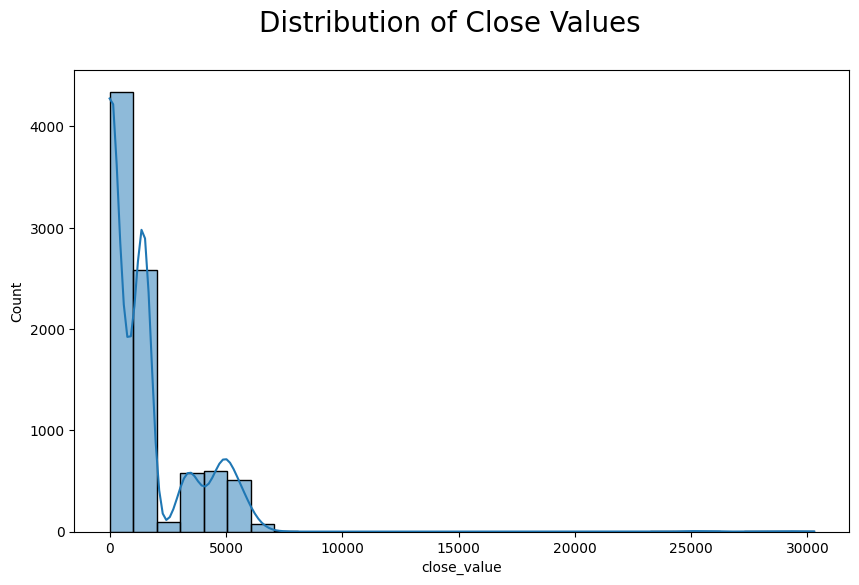

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['close_value'], bins=30,kde=True)
plt.suptitle('Distribution of Close Values',fontsize=20)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'GTX Plus Basic'),
  Text(1, 0, 'GTXPro'),
  Text(2, 0, 'MG Special'),
  Text(3, 0, 'GTX Basic'),
  Text(4, 0, 'MG Advanced'),
  Text(5, 0, 'GTX Plus Pro'),
  Text(6, 0, 'GTK 500')])

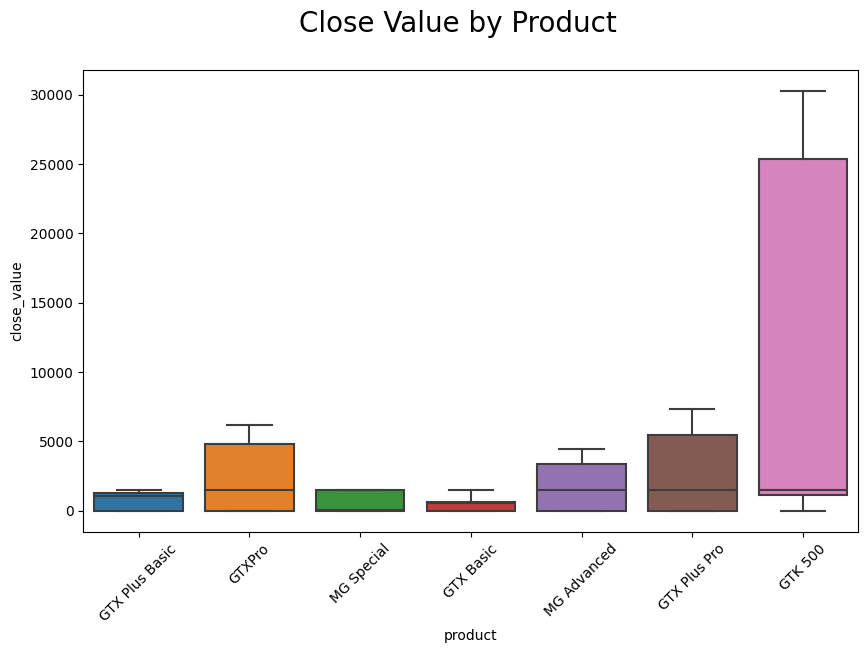

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='product', y='close_value')
plt.suptitle("Close Value by Product",fontsize=20)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Won'),
  Text(1, 0, 'Engaging'),
  Text(2, 0, 'Lost'),
  Text(3, 0, 'Prospecting')])

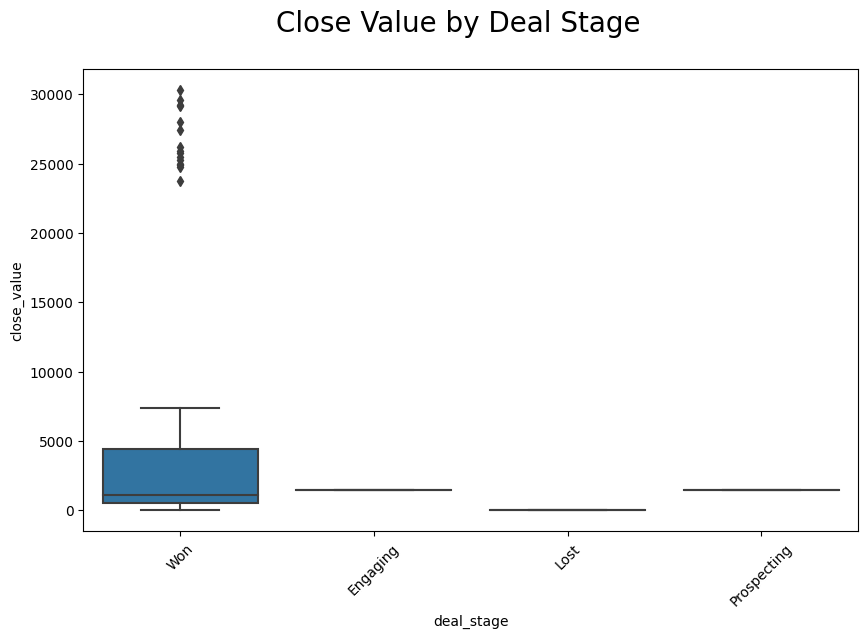

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='deal_stage', y='close_value')
plt.suptitle("Close Value by Deal Stage",fontsize=20)
plt.xticks(rotation=45)

# Grouping & Aggregation

In [29]:
# Sales by Agent
sales_by_agent = dataset.groupby('sales_agent')['close_value'].sum().sort_values(ascending=False)
sales_by_agent

sales_agent
Darcel Schlecht       1442274
Vicki Laflamme         633356
Kary Hendrixson        607768
Cassey Cress           577139
Zane Levy              561188
Corliss Cosme          541726
James Ascencio         504423
Gladys Colclough       472324
Daniell Hammack        471509
Maureen Marcano        457675
Kami Bicknell          450556
Markita Hansen         446502
Donn Cantrell          445860
Anna Snelling          441936
Reed Clapper           438336
Marty Freudenburg      420825
Jonathan Berthelot     405576
Elease Gluck           365185
Hayden Neloms          346611
Boris Faz              346561
Versie Hillebrand      332223
Lajuana Vencill        313832
Rosalina Dieter        309903
Moses Frase            304032
Cecily Lampkin         293870
Rosie Papadopoulos     288279
Niesha Huffines        272321
Violet Mclelland       224751
Wilburn Farren         203830
Garret Kinder          197773
Name: close_value, dtype: int32

Text(0.5, 0.98, 'Most sales by the agent')

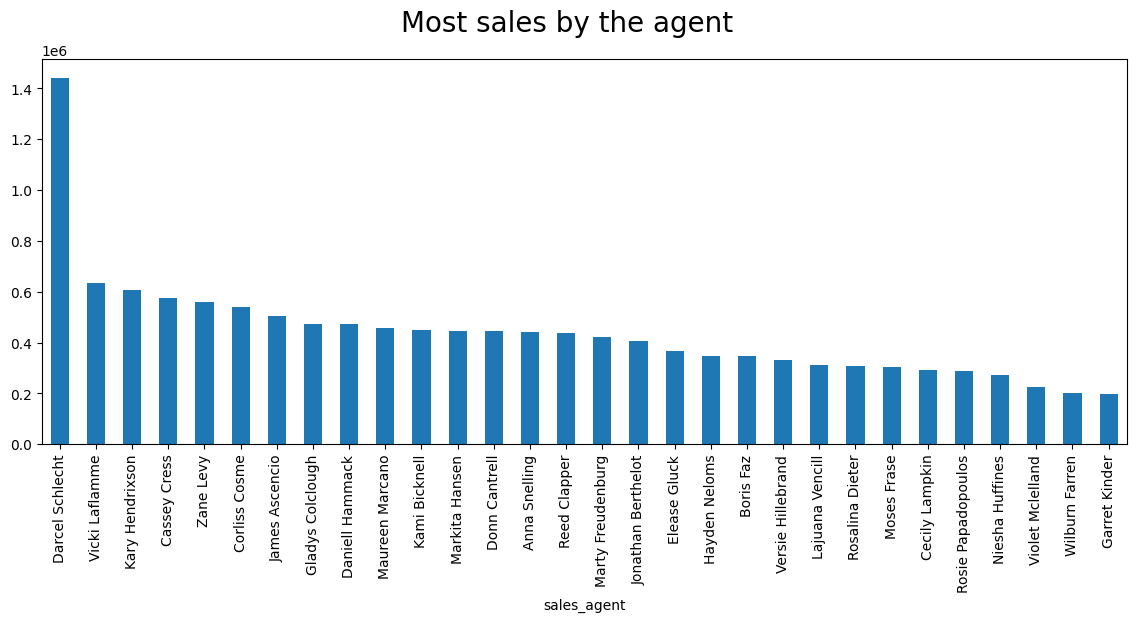

In [30]:
sales_by_agent.plot(kind='bar',figsize=(14,5))
plt.suptitle('Most sales by the agent',fontsize=20)

In [31]:
sales_max_amt=dataset.groupby('sales_agent')['close_value'].max().sort_values(ascending=False)
sales_max_amt

sales_agent
Rosalina Dieter       30288
Markita Hansen        29617
Elease Gluck          29220
James Ascencio         7356
Moses Frase            7300
Daniell Hammack        6920
Garret Kinder          6818
Reed Clapper           6767
Gladys Colclough       6719
Anna Snelling          6659
Maureen Marcano        6656
Zane Levy              6637
Kary Hendrixson        6555
Marty Freudenburg      6553
Donn Cantrell          6540
Hayden Neloms          6529
Cassey Cress           6509
Boris Faz              6469
Niesha Huffines        6384
Corliss Cosme          6372
Darcel Schlecht        6360
Lajuana Vencill        6340
Kami Bicknell          6304
Versie Hillebrand      6282
Wilburn Farren         6263
Rosie Papadopoulos     6229
Vicki Laflamme         6206
Jonathan Berthelot     6096
Cecily Lampkin         5882
Violet Mclelland       5855
Name: close_value, dtype: int32

Text(0.5, 0.98, 'Maximum amount by the sales agent')

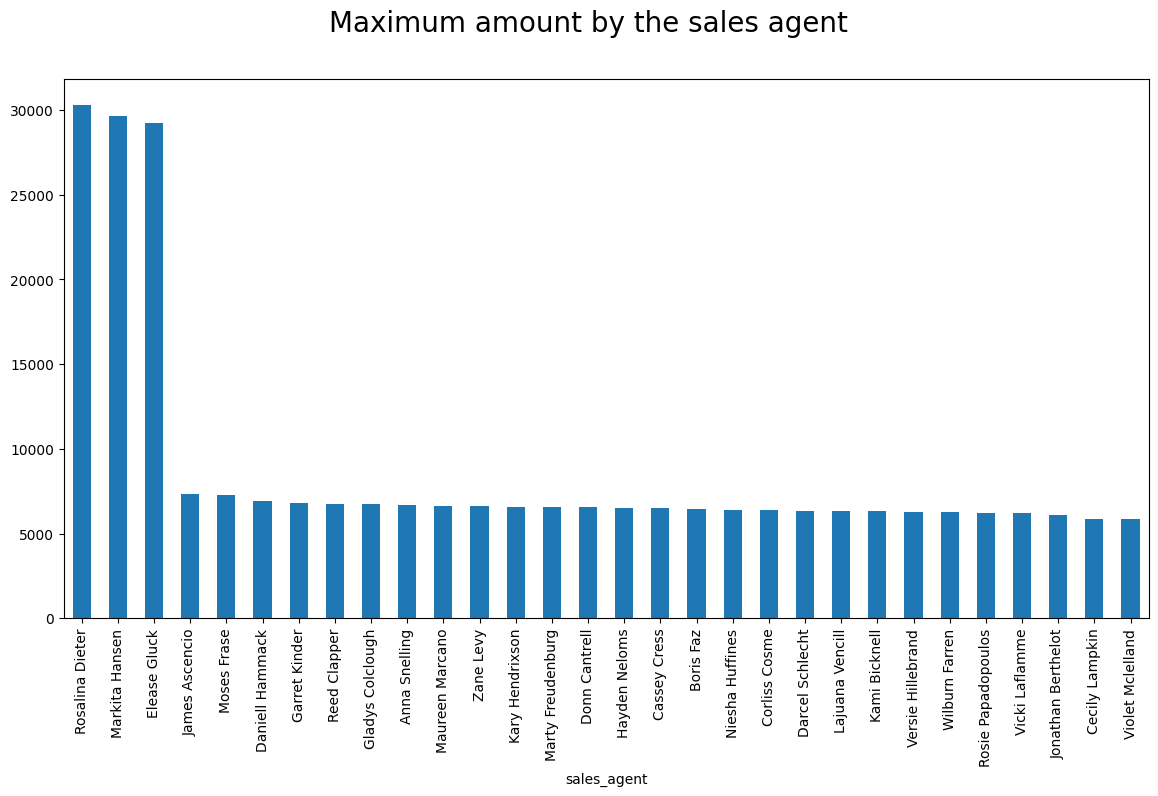

In [32]:
sales_max_amt.plot(kind='bar',figsize=(14,7))
plt.suptitle('Maximum amount by the sales agent',fontsize=20)

In [33]:
# Sales by Product
sales_by_product = dataset.groupby('product')['close_value'].sum().sort_values(ascending=False)
sales_by_product

product
GTXPro            4006748
GTX Plus Pro      2961921
MG Advanced       2705107
GTX Plus Basic    1199955
GTX Basic         1139963
MG Special         681488
GTK 500            422962
Name: close_value, dtype: int32

Text(0.5, 0.98, 'Product wise sales')

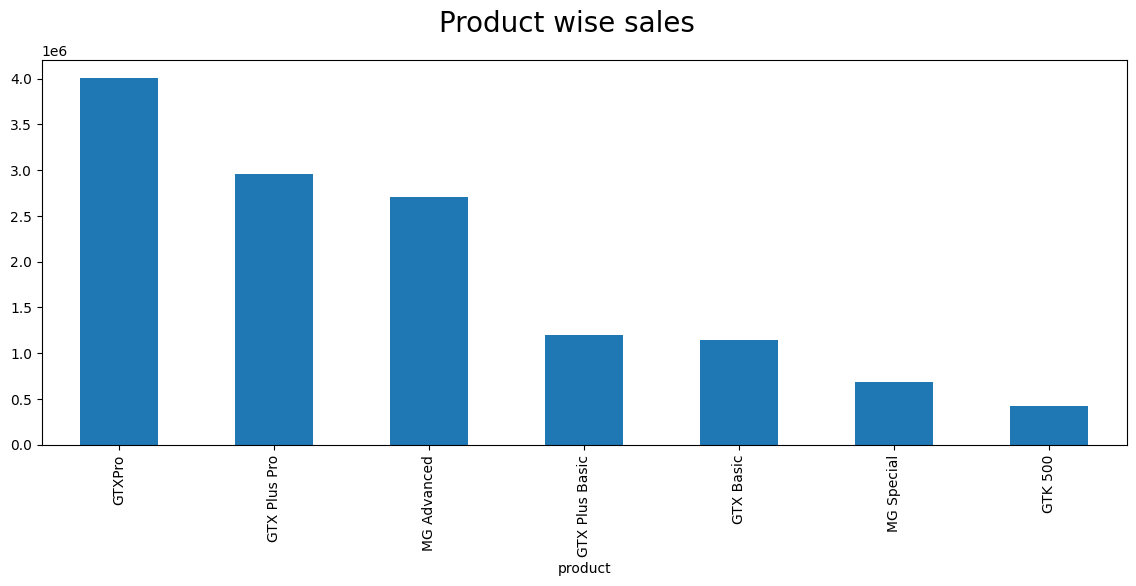

In [34]:
sales_by_product.plot(kind='bar',figsize=(14,5))
plt.suptitle('Product wise sales',fontsize=20)

In [35]:
# Sales by Agent
account_wise_close_value = dataset.groupby('account')['close_value'].sum().sort_values(ascending=False)
account_wise_close_value

account
Hottechi         2328637
Kan-code          354865
Konex             279675
Condax            222800
Cheers            209940
                  ...   
Sumace             76295
Bluth Company      73293
Zathunicon         66046
Donware            61107
Golddex            60572
Name: close_value, Length: 85, dtype: int32

Text(0.5, 0.98, 'Account Wise Closing Value')

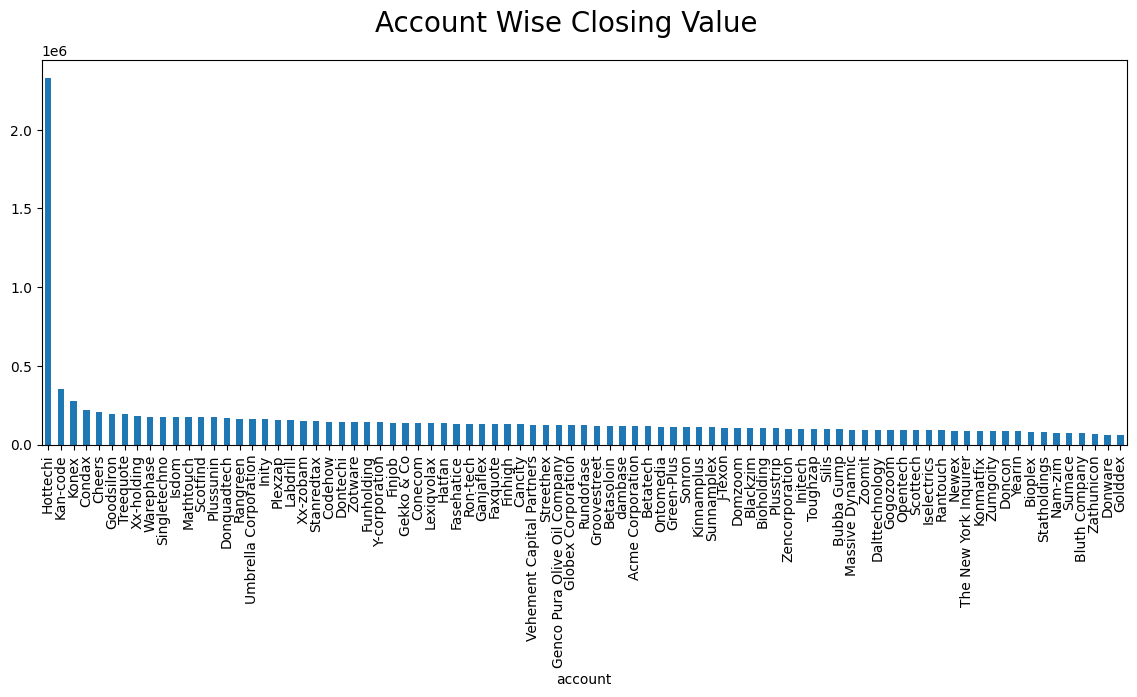

In [36]:
account_wise_close_value.plot(kind='bar',figsize=(14,5))
plt.suptitle('Account Wise Closing Value',fontsize=20)

Text(0.5, 0.98, 'Distribution of Time to Close')

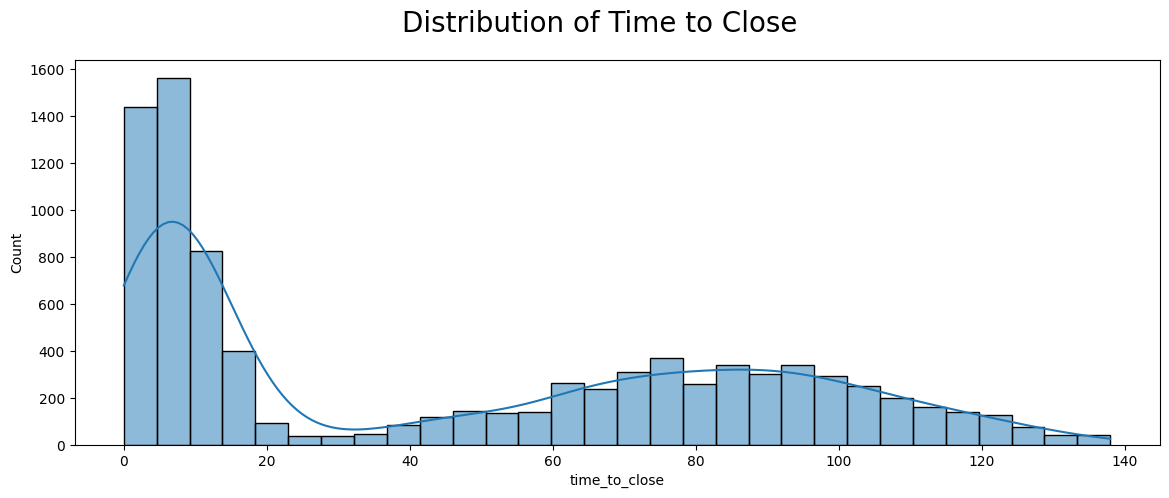

In [37]:
# Calculate time to close in days
dataset['time_to_close'] = (dataset['close_date'] - dataset['engage_date']).dt.days
plt.figure(figsize=(14,5))
sns.histplot(dataset['time_to_close'].dropna(), bins=30, kde=True)
plt.suptitle('Distribution of Time to Close',fontsize=20)

# PIVOT TABLE ANALYSIS.

In [38]:
pivot_table_1=pd.pivot_table(data=dataset,values='close_value',index='sales_agent',columns=['deal_stage'])
pivot_table_1

deal_stage,Engaging,Lost,Prospecting,Won
sales_agent,,,,
Anna Snelling,1490.0,0.0,1490.0,1322.384615
Boris Faz,1490.0,0.0,NaN,2590.405941
Cassey Cress,1490.0,0.0,NaN,2763.736196
Cecily Lampkin,1490.0,0.0,1490.0,2147.663551
Corliss Cosme,1490.0,0.0,NaN,2806.906667
Daniell Hammack,1490.0,0.0,NaN,3194.991228
Darcel Schlecht,1490.0,0.0,1490.0,3304.338109
Donn Cantrell,NaN,0.0,NaN,2821.898734
Elease Gluck,1490.0,0.0,NaN,3614.937500


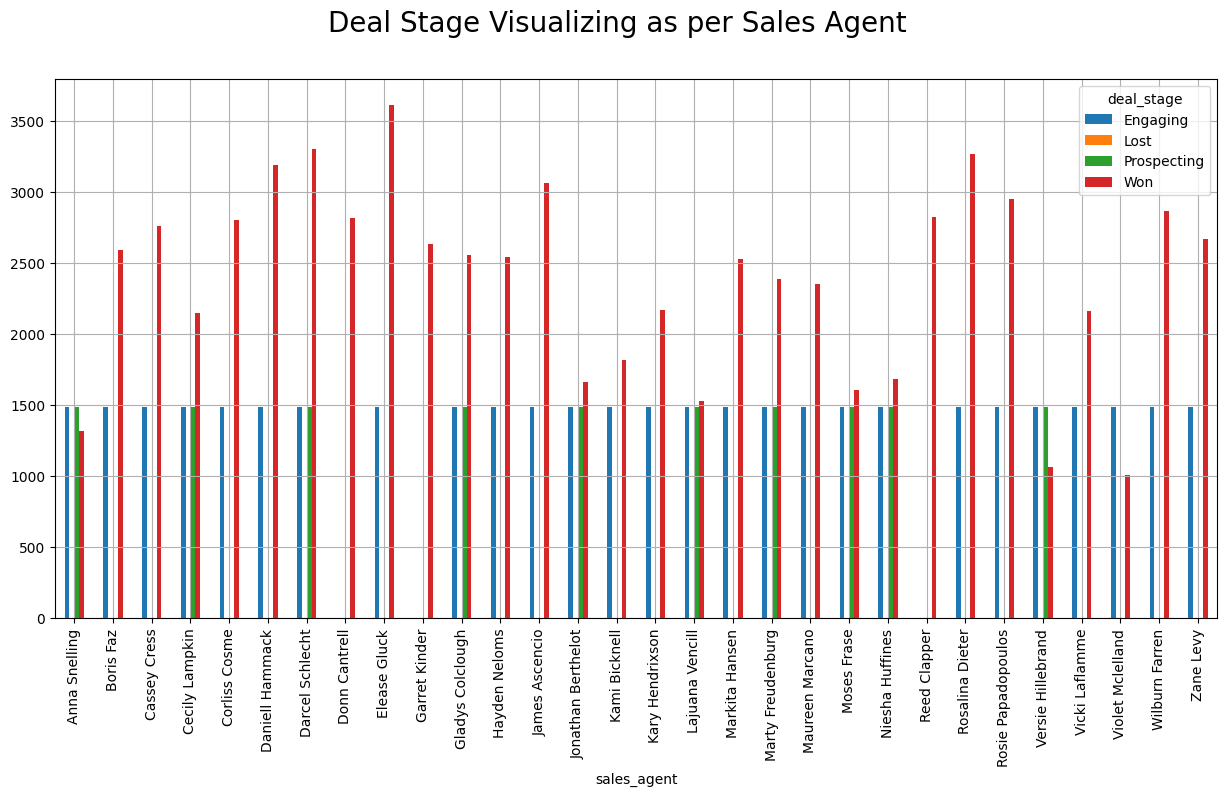

In [39]:
pivot_table_1.plot(kind='bar',figsize=(15,7))
plt.suptitle('Deal Stage Visualizing as per Sales Agent',fontsize=20)
plt.grid()

In [40]:
pivot_table_2=pd.pivot_table(data=dataset,values='close_value',index='product',columns=['deal_stage'])
pivot_table_2

deal_stage,Engaging,Lost,Prospecting,Won
product,,,,
GTK 500,1490.0,0.0,NaN,26707.466667
GTX Basic,1490.0,0.0,1490.0,545.642623
GTX Plus Basic,1490.0,0.0,1490.0,1080.053599
GTX Plus Pro,1490.0,0.0,1490.0,5489.876827
GTXPro,1490.0,0.0,1490.0,4815.607682
MG Advanced,1490.0,0.0,1490.0,3388.970948
MG Special,1490.0,0.0,1490.0,55.192938


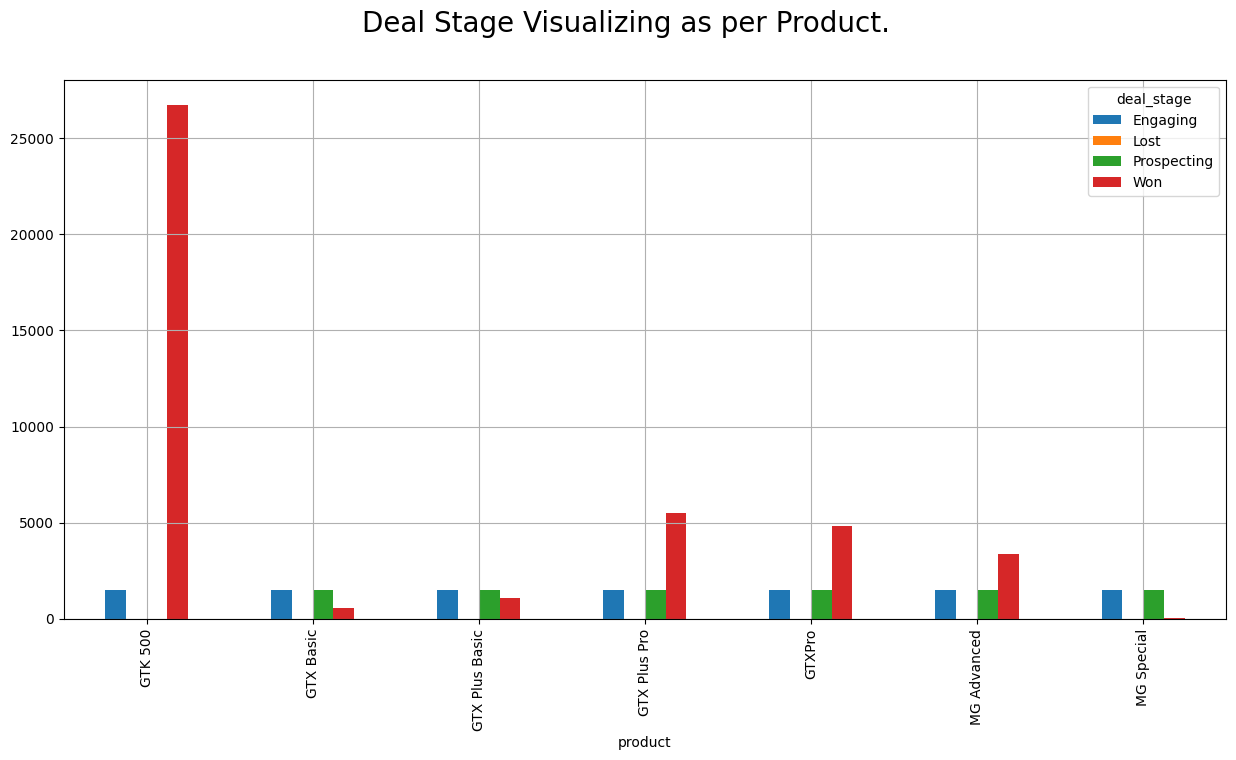

In [41]:
pivot_table_2.plot(kind='bar',figsize=(15,7))
plt.suptitle('Deal Stage Visualizing as per Product.',fontsize=20)
plt.grid()

In [42]:
pivot_table_3=pd.pivot_table(data=dataset,values='close_value',index='account',columns=['deal_stage'])
pivot_table_3

deal_stage,Engaging,Lost,Prospecting,Won
account,,,,
Acme Corporation,1490.0,0.0,1490.0,2992.470588
Betasoloin,1490.0,0.0,1490.0,2854.000000
Betatech,1490.0,0.0,1490.0,2026.566038
Bioholding,1490.0,0.0,1490.0,1819.820000
Bioplex,1490.0,0.0,1490.0,2173.967742
...,...,...,...,...
Zencorporation,1490.0,0.0,1490.0,2626.969697
Zoomit,1490.0,0.0,1490.0,2323.757576
Zotware,1490.0,0.0,NaN,2943.382979


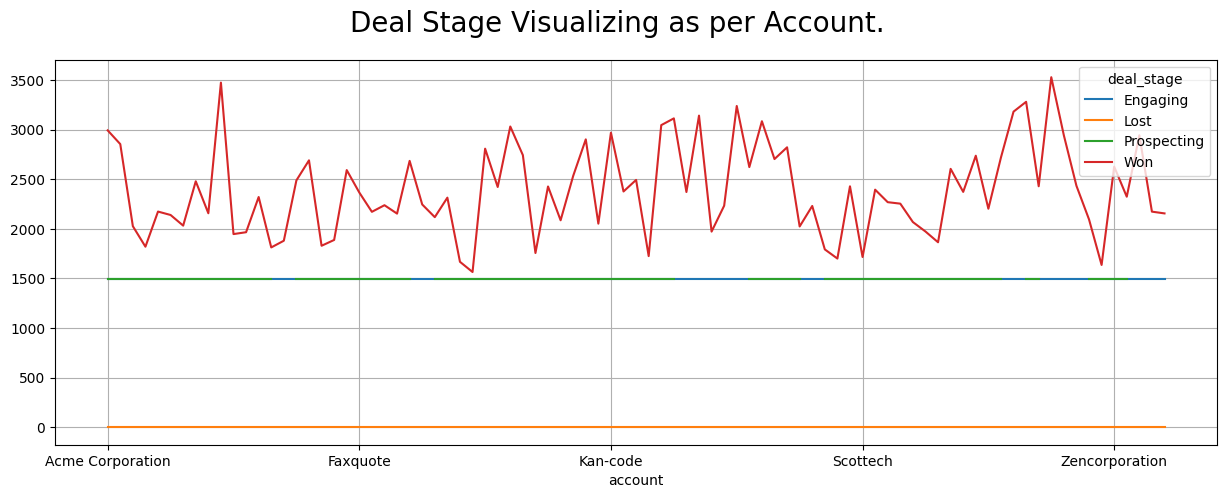

In [43]:
pivot_table_3.plot(kind='line',figsize=(15,5))
plt.suptitle('Deal Stage Visualizing as per Account.',fontsize=20)
plt.grid()

# Feature Engineering

In [44]:
dataset['Deal_Size_Category'] = pd.cut(dataset['close_value'], bins=[0, 10000, 50000, np.inf], labels=['Small', 'Medium', 'Large'])

In [45]:
dataset['Account_Deal_Count'] = dataset.groupby('account')['opportunity_id'].transform('count')
dataset['Account_Avg_Close_Value'] = dataset.groupby('account')['close_value'].transform('mean')

In [46]:
dataset

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,engage_year,engage_month,close_year,close_month,time_to_close,Deal_Size_Category,Account_Deal_Count,Account_Avg_Close_Value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054,2016,10,2017,3,132,Small,101,1292.544554
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514,2016,10,2017,3,137,Small,119,1471.537815
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50,2016,10,2017,3,133,Small,101,1292.544554
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588,2016,10,2017,3,135,Small,121,1207.793388
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517,2016,10,2017,3,128,Small,87,1544.045977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,9MIWFW5J,Versie Hillebrand,MG Advanced,Hottechi,Prospecting,2017-12-27,2017-12-29,1490,2017,12,2017,12,2,Small,1625,1433.007385
8796,6SLKZ8FI,Versie Hillebrand,MG Advanced,Hottechi,Prospecting,2017-12-27,2017-12-29,1490,2017,12,2017,12,2,Small,1625,1433.007385
8797,LIB4KUZJ,Versie Hillebrand,MG Advanced,Hottechi,Prospecting,2017-12-27,2017-12-29,1490,2017,12,2017,12,2,Small,1625,1433.007385
8798,18IUIUK0,Versie Hillebrand,MG Advanced,Hottechi,Prospecting,2017-12-27,2017-12-29,1490,2017,12,2017,12,2,Small,1625,1433.007385
